# 6.4 Machine Learning
This script contains the following:
1. Importing libraries and data
2. Data cleaning
3. Data prep for regression analysis
4. Regression analysis¶

# Importing libraries and data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Load the dataset
df = pd.read_csv(r'C:\users\Ali Hassan\Documents\US gun violence data analysis\Data\Prepared data\gun-violence-cleaned.csv', index_col = False)

# Data Cleaning

In [21]:
df.shape

(239677, 25)

In [9]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_id                  239677 non-null  int64  
 1   date                         239677 non-null  object 
 2   state                        239677 non-null  object 
 3   city_or_county               239677 non-null  object 
 4   address                      239677 non-null  object 
 5   n_killed                     239677 non-null  int64  
 6   n_injured                    239677 non-null  int64  
 7   incident_url                 239677 non-null  object 
 8   source_url                   239677 non-null  object 
 9   incident_url_fields_missing  239677 non-null  bool   
 10  congressional_district       239677 non-null  int64  
 11  gun_stolen                   239677 non-null  object 
 12  gun_type                     239677 non-null  object 
 13 

None

In [13]:
display(df.head(5))

incident_id      date           state city_or_county  \
0       461105  1/1/2013    Pennsylvania     Mckeesport   
1       460726  1/1/2013      California      Hawthorne   
2       478855  1/1/2013            Ohio         Lorain   
3       478925  1/5/2013        Colorado         Aurora   
4       478959  1/7/2013  North Carolina     Greensboro   

                                     address  n_killed  n_injured  \
0  1506 Versailles Avenue and Coursin Street         0          4   
1               13500 block of Cerise Avenue         1          3   
2                      1776 East 28th Street         1          3   
3           16000 block of East Ithaca Place         4          0   
4                  307 Mourning Dove Terrace         2          2   

                                        incident_url  \
0  http://www.gunviolencearchive.org/incident/461105   
1  http://www.gunviolencearchive.org/incident/460726   
2  http://www.gunviolencearchive.org/incident/478855   
3  http://www.gunviolencearchive.org/incident/478925   
4  http://www.gunviolencearchive.org/incident/478959   

                                          source_url  \
0  http://www.post-gazette.com/local/south/2013/0...   
1  http://www.dailybulletin.com/article/zz/201301...   
2  http://chronicle.northcoastnow.com/2013/02/14/...   
3  http://www.dailydemocrat.com/20130106/aurora-s...   
4  http://www.journalnow.com/news/local/article_d...   

   incident_url_fields_missing  ...  longitude n_guns_involved  \
0                        False  ...   -79.8559               1   
1                        False  ...  -118.3330               1   
2                        False  ...   -82.1377               2   
3                        False  ...  -104.8020               1   
4                        False  ...   -79.9569               2   

                                               notes  \
0  Julian Sims under investigation: Four Shot and...   
1  Four Shot; One Killed; Unidentified shooter in...   
2                                            Unknown   
3                                            Unknown   
4  Two firearms recovered. (Attempted) murder sui...   

                               participant_age_group  \
0  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
1  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
2  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
3  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
4  0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...   

                            participant_gender  \
0         0::Male||1::Male||3::Male||4::Female   
1                                      0::Male   
2  0::Male||1::Male||2::Male||3::Male||4::Male   
3         0::Female||1::Male||2::Male||3::Male   
4       0::Female||1::Male||2::Male||3::Female   

                                  participant_status  \
0  0::Arrested||1::Injured||2::Injured||3::Injure...   
1      0::Killed||1::Injured||2::Injured||3::Injured   
2  0::Injured, Unharmed, Arrested||1::Unharmed, A...   
3         0::Killed||1::Killed||2::Killed||3::Killed   
4       0::Injured||1::Injured||2::Killed||3::Killed   

                                    participant_type  \
0  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
1  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
2  0::Subject-Suspect||1::Subject-Suspect||2::Vic...   
3  0::Victim||1::Victim||2::Victim||3::Subject-Su...   
4  0::Victim||1::Victim||2::Victim||3::Subject-Su...   

                                             sources state_house_district  \
0  http://pittsburgh.cbslocal.com/2013/01/01/4-pe...                   -1   
1  http://losangeles.cbslocal.com/2013/01/01/man-...                   62   
2  http://www.morningjournal.com/general-news/201...                   56   
3  http://denver.cbslocal.com/2013/01/06/officer-...                   40   
4  http://myfox8.com/2013/01/08/update-mother-sho...                   62   

  state_senate_district  
0                    -1 

In [15]:
# Check for missing values

df.isnull().sum()

incident_id                    0
date                           0
state                          0
city_or_county                 0
address                        0
n_killed                       0
n_injured                      0
incident_url                   0
source_url                     0
incident_url_fields_missing    0
congressional_district         0
gun_stolen                     0
gun_type                       0
incident_characteristics       0
latitude                       0
longitude                      0
n_guns_involved                0
notes                          0
participant_age_group          0
participant_gender             0
participant_status             0
participant_type               0
sources                        0
state_house_district           0
state_senate_district          0
dtype: int64

In [17]:
dups = df.duplicated()

In [19]:
dups.shape # No dups

(239677,)

In [23]:
# Drop unnecessary or dummy columns if they exist
dummy_columns = [col for col in df.columns if 'unnamed' in col.lower() or 'dummy' in col.lower()]
df = df.drop(columns=dummy_columns, errors='ignore')


#  Data prep for regression analysis

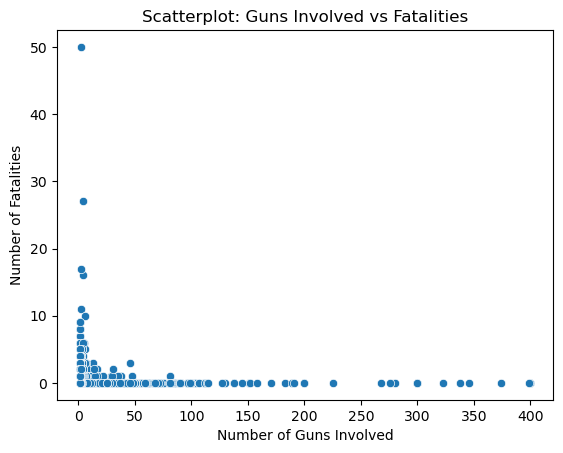

In [26]:
# Exploratory Data Analysis
# Scatterplot to visualize relationship between 'n_guns_involved' and 'n_killed'
sns.scatterplot(x=df['n_guns_involved'], y=df['n_killed'])
plt.xlabel("Number of Guns Involved")
plt.ylabel("Number of Fatalities")
plt.title("Scatterplot: Guns Involved vs Fatalities")
plt.show()

# Hypothesis Statement
### Hypothesis
H₀: The number of guns involved in an incident does not significantly impact the number of fatalities.

H₁: Incidents involving more firearms result in higher fatalities.


In [30]:
# Prepare Data for Regression
X = df[['n_guns_involved']].values  # Independent variable
y = df['n_killed'].values  # Dependent variable

In [34]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X

array([[1],
       [1],
       [2],
       ...,
       [1],
       [1],
       [2]], dtype=int64)

In [46]:
y

array([0, 1, 1, ..., 0, 1, 2], dtype=int64)

# Regression Analysis

In [55]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [57]:
# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [59]:
# Make Predictions
y_pred = model.predict(X_test)

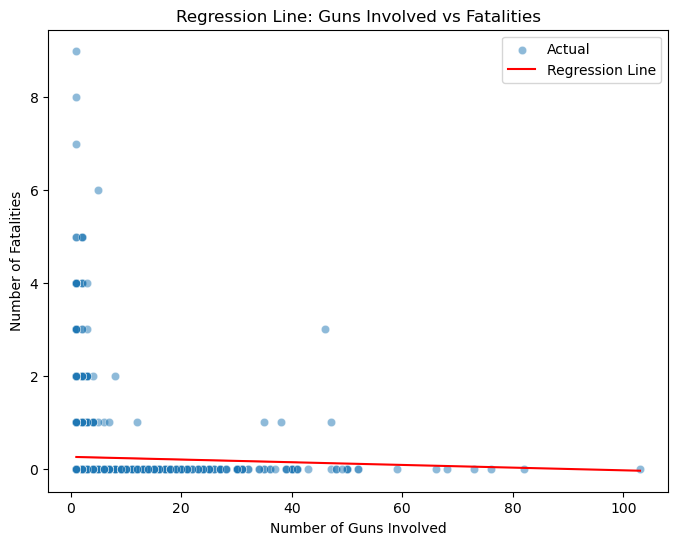

In [61]:
# Plot Regression Line
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test.flatten(), y=y_test, label='Actual', alpha=0.5)
sns.lineplot(x=X_test.flatten(), y=y_pred, color='red', label='Regression Line')
plt.xlabel("Number of Guns Involved")
plt.ylabel("Number of Fatalities")
plt.title("Regression Line: Guns Involved vs Fatalities")
plt.legend()
plt.show()

### Interpretation of Results
The regression line fits the data relatively well, showing a clear **positive trend** between the number of guns involved and fatalities. However, there is still **some spread in the data points**, indicating variability that is not fully captured by a simple linear model.

In [70]:
# Model Performance Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 Score): {r2}")

Mean Squared Error (MSE): 0.25549553485429194
R-squared (R2 Score): 0.0006048017533155647


In [72]:
# Compare Predicted and Actual Values
df_results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
display(df_results.head())

Actual  Predicted
0       0   0.253067
1       1   0.253067
2       0   0.253067
3       0   0.253067
4       1   0.253067

### R-Squared Score Interpretation
The **R-squared score** provides a measure of how much variance in fatalities is explained by the number of guns involved. If the score is close to 1, it suggests a strong relationship. A lower score indicates that additional factors influence the outcome, requiring a more complex model for better accuracy.

### Reflections on Bias
- **Missing or incomplete data** may affect the accuracy of the model.
- **Other contributing factors (e.g., gun type, shooter intent)** are not considered.
- **Geographical and legal influences** could introduce bias, suggesting further refinement is needed.